In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cs = pd.read_csv('C:/Users/mohit/OneDrive/Desktop/ProjectA/Superstore/Superstoree.csv' ,encoding='ISO-8859-1')
print(list(cs.columns))

#PHASE 1

#to check if there are any null values in all column

print(cs.isnull().sum())
#print(cs.head())

#Converted all the date columns to datetime format

cs['Ship Date'] = pd.to_datetime(cs['Ship Date'])
cs['Order Date'] = pd.to_datetime(cs['Order Date'])
print('*'*100)
print(cs.head())

#Checking on duplicates of Order ID

print('*'*100)
print(f"Original shape: {cs.shape}")
cs = cs.drop_duplicates(subset = ['Product ID','Order ID'])
print(f"After removing duplicates: {cs.shape}")

#

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
****************************************************************************************************
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG

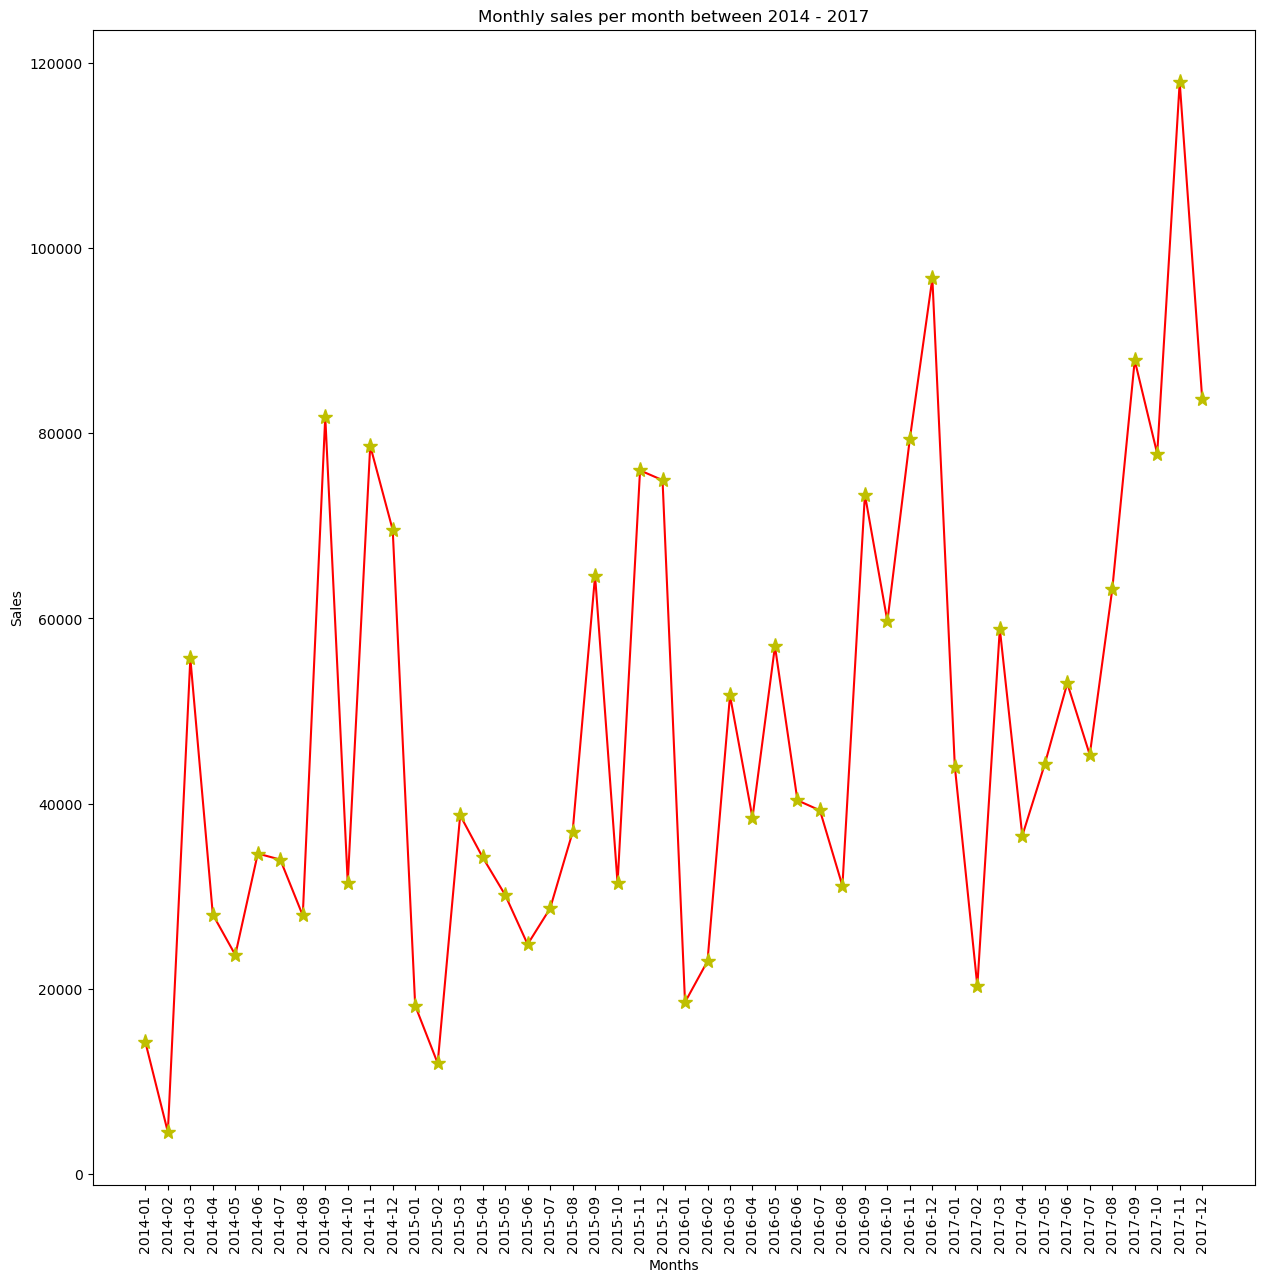

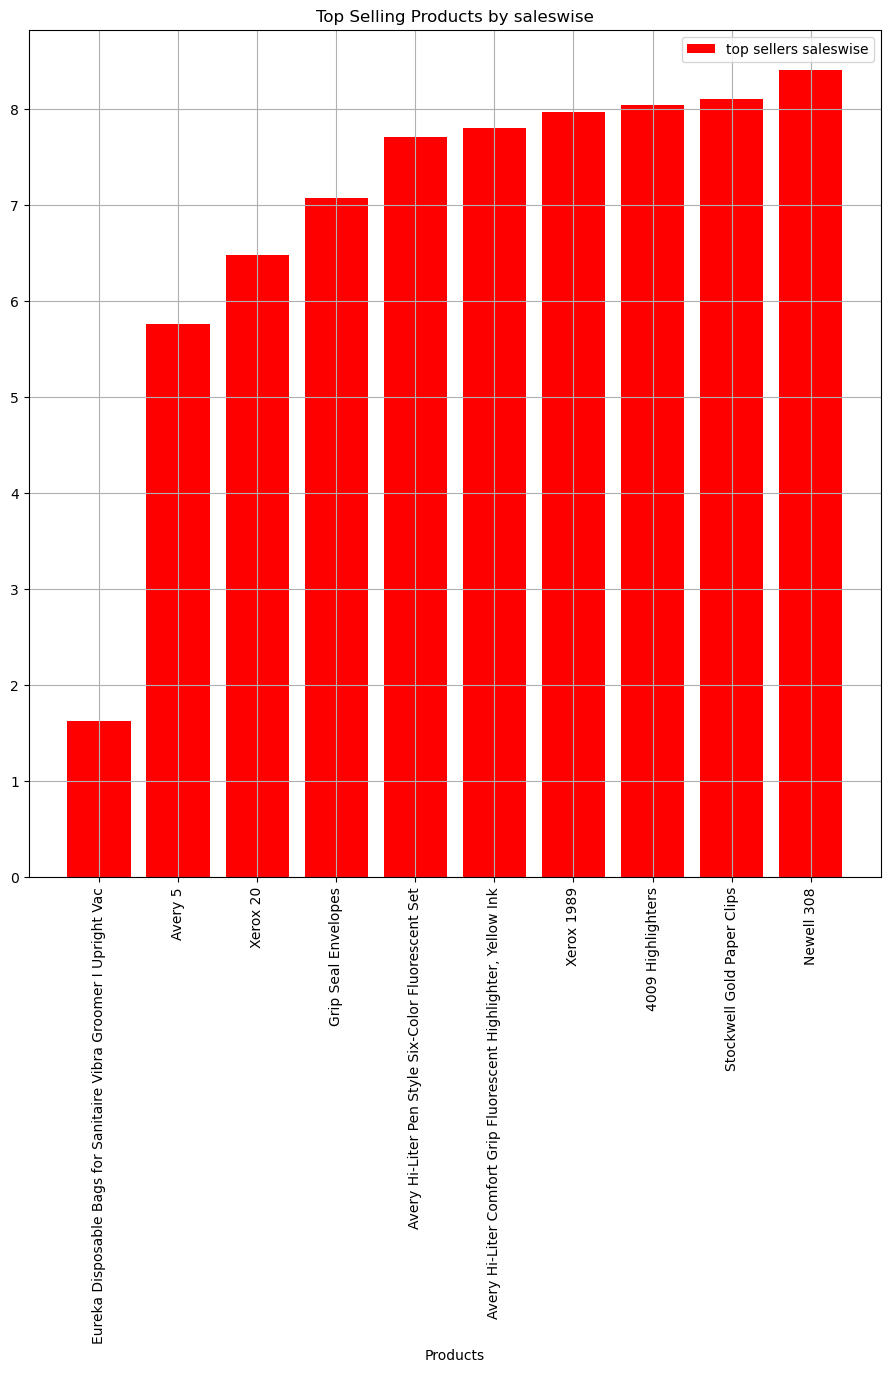

In [2]:
#PHASE 2 Exploratory Data Analysis

#to get sales trend over time
cs['Month'] = cs['Order Date'].dt.to_period('M')
ms = cs.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize = (15,15))
plt.plot(ms['Month'].astype(str),ms['Sales'],linestyle = 'solid',
         marker = '*',mec = 'y',mfc = 'y',markersize = 11,color = 'r',label="Sales per month")
plt.title("Monthly sales per month between 2014 - 2017")
plt.xlabel('Months')
plt.ylabel("Sales")
plt.xticks(rotation = 90)
plt.show()

#Top performing products(saleswise)

tp = cs.groupby("Product Name")[['Sales','Profit']].sum()
tps = tp.sort_values(by = 'Sales',ascending = True).head(10)
tpp = tp.sort_values(by = 'Profit',ascending = True).tail(10)
tppp = tpp[tpp['Profit']>0]

plt.figure(figsize = (11,11))
plt.bar(tps.index,tps['Sales'],color = 'r',label = 'top sellers saleswise')
plt.title('Top Selling Products by saleswise')
plt.xlabel('Products')
plt.legend(loc = 'best')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()



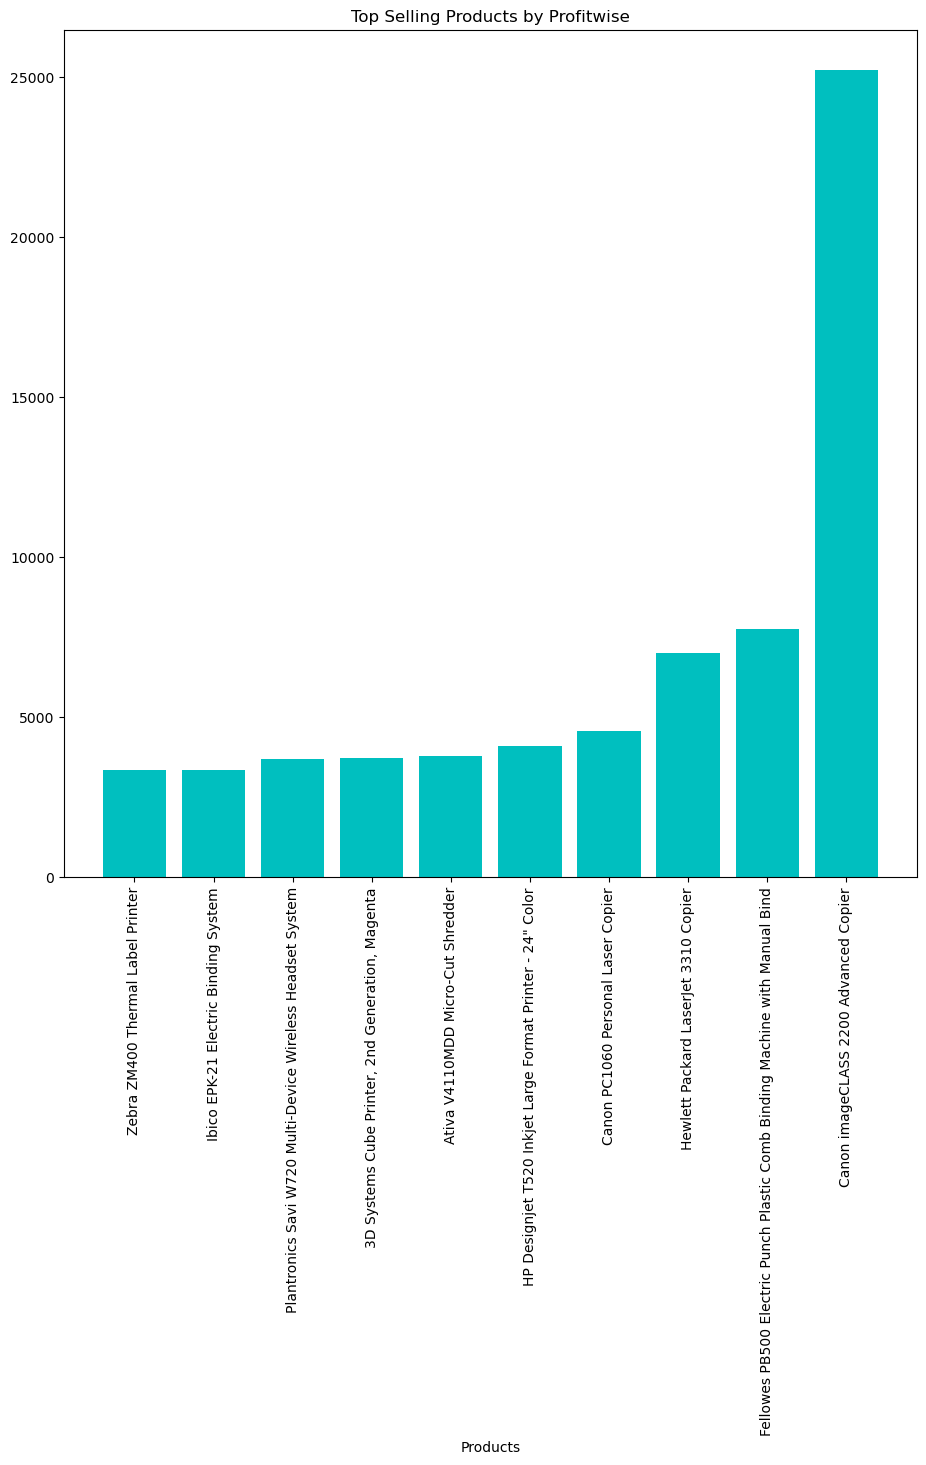

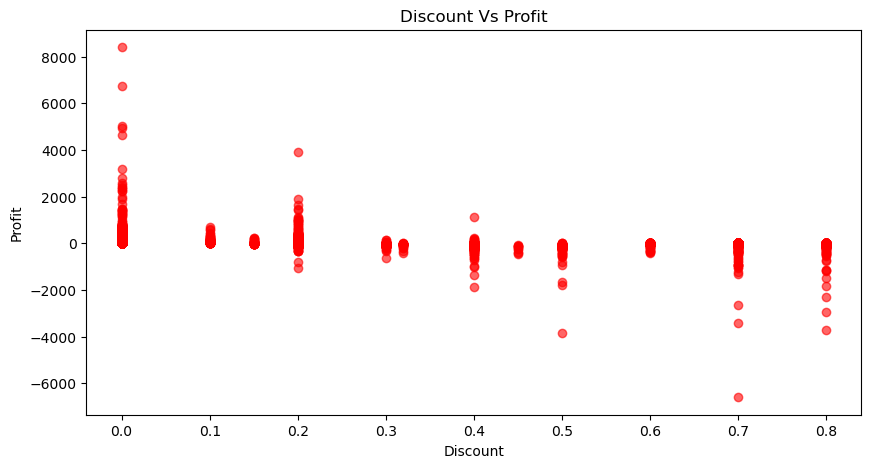

In [3]:
#Top performing products(profitwise)
plt.figure(figsize = (11,11))
plt.bar(tpp.index,tpp['Profit'],color = 'c',label = 'top seller profitwise')
plt.title("Top Selling Products by Profitwise")
plt.xlabel("Products")
plt.xticks(rotation = 90)
plt.show()

#Profit Vs Discount

plt.figure(figsize=(10,5))
plt.scatter(cs['Discount'],cs['Profit'],alpha = 0.6,color = 'r')
plt.title("Discount Vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

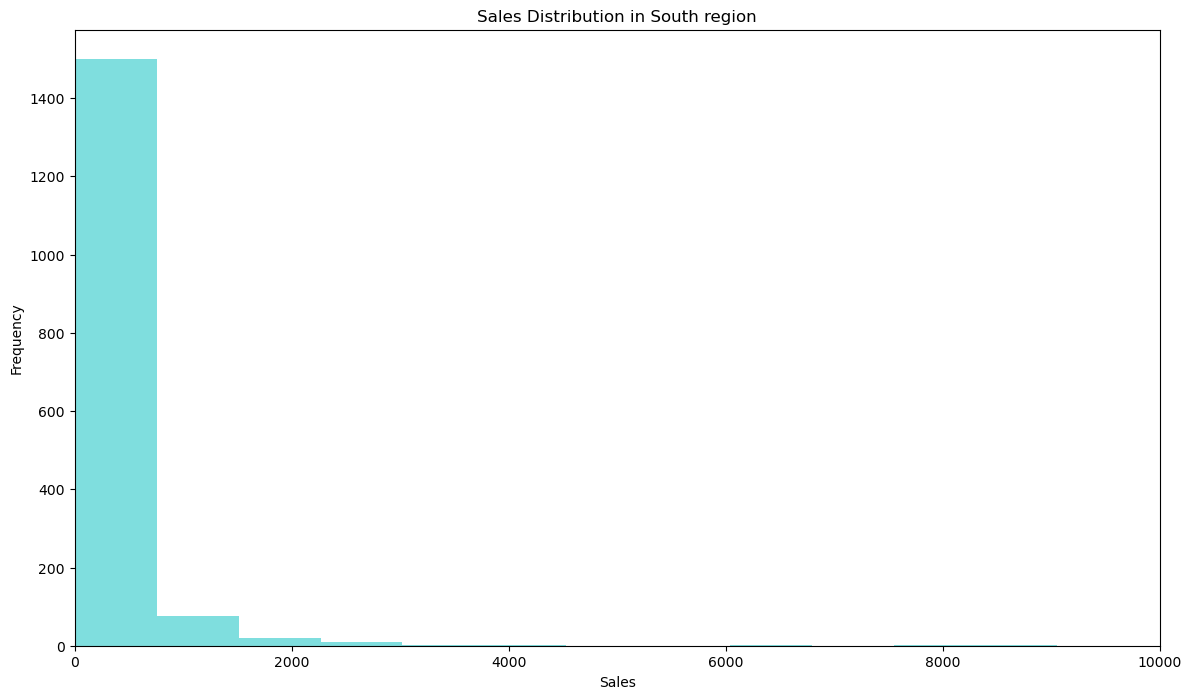

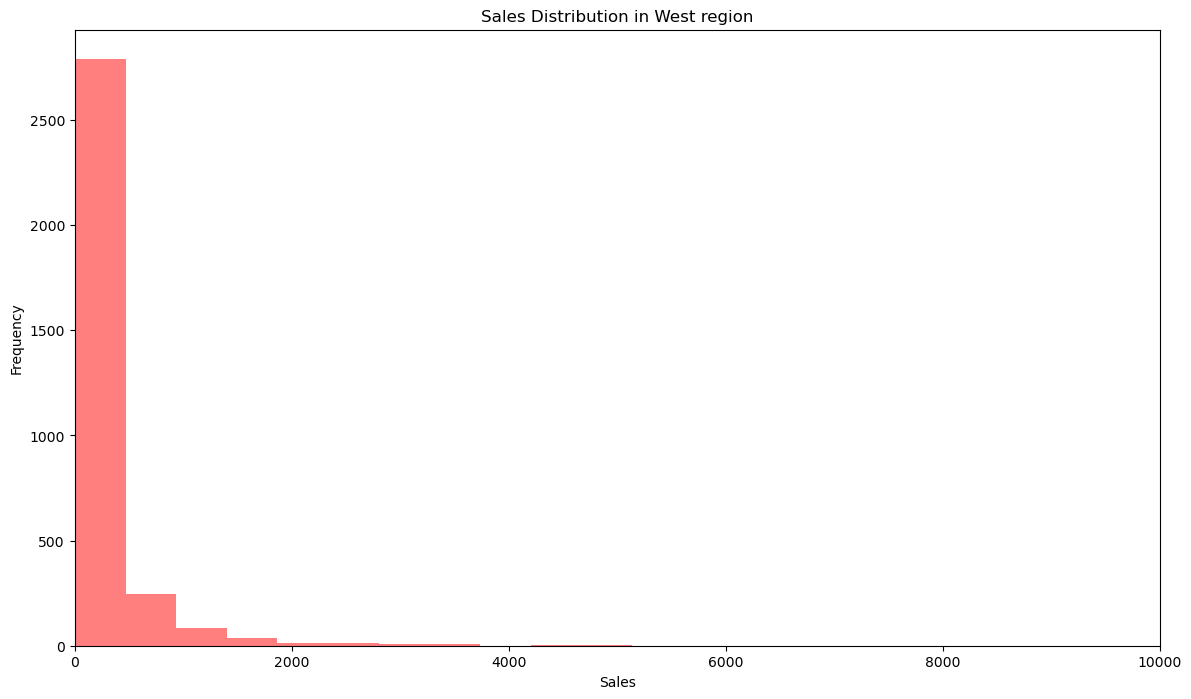

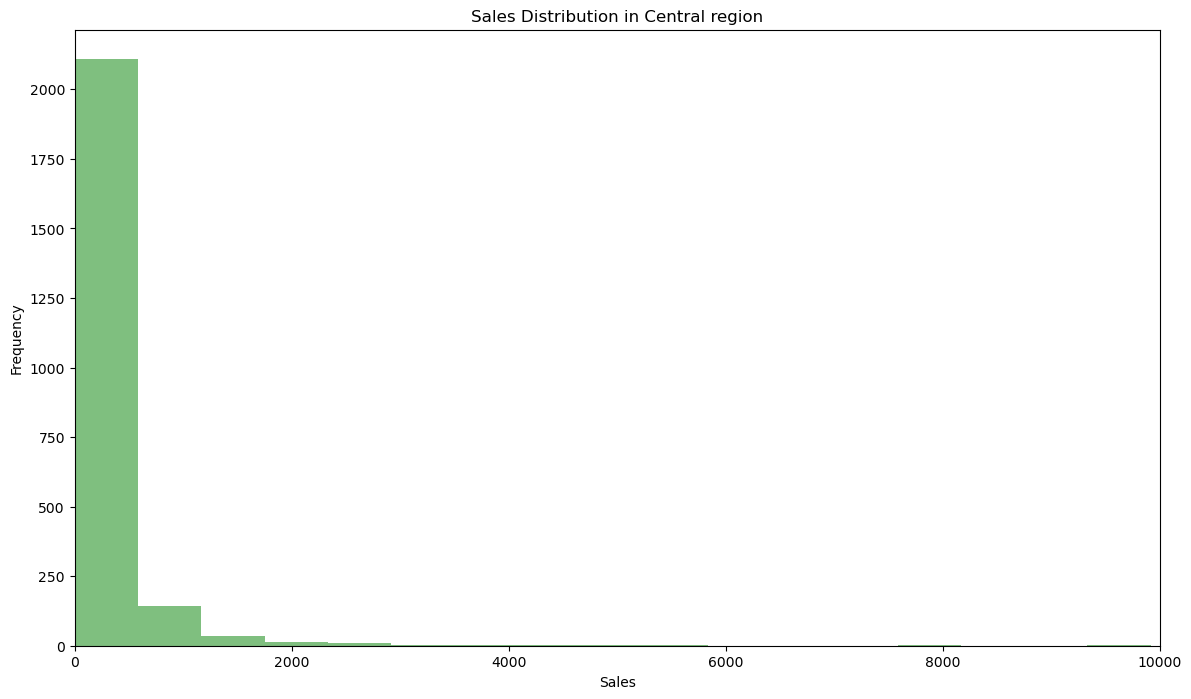

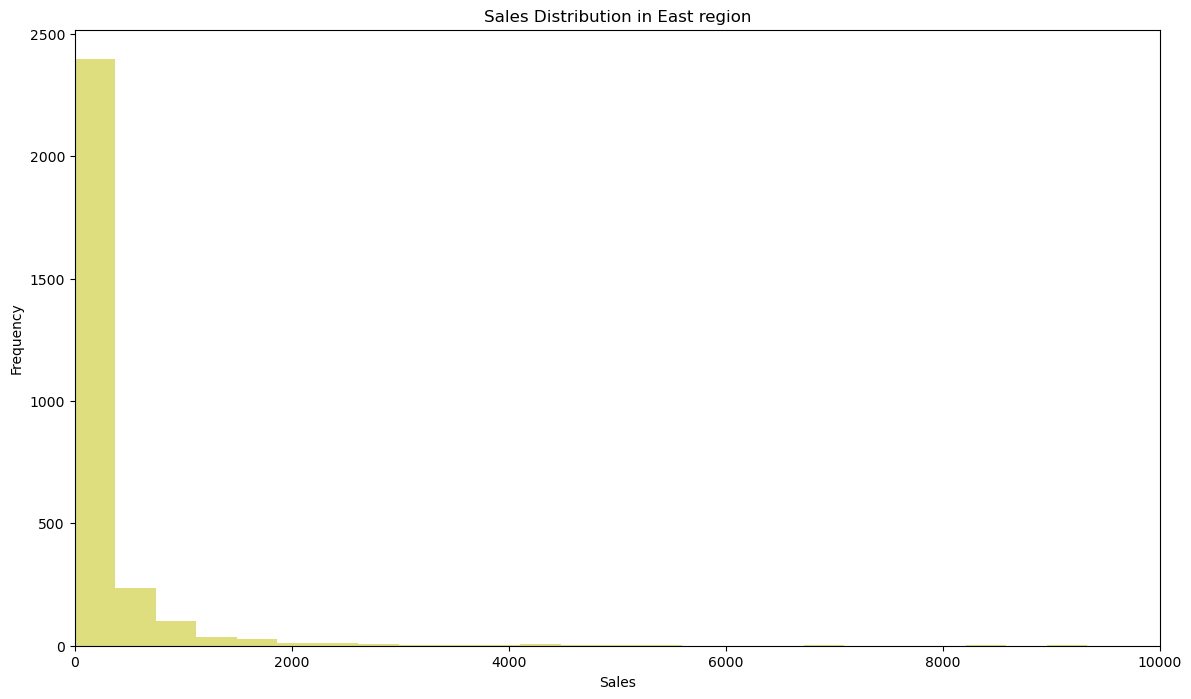

In [4]:
#histogram on sales by region

reg = cs['Region'].unique()
col = ['c','r','g','y']
i = 0
for region in reg:
    plt.figure(figsize = (14,8))
    regdata = cs[cs["Region"] == region]['Sales']
    plt.hist(regdata,bins = 30,alpha = 0.5,color = col[i])
    plt.xlabel("Sales")
    plt.xlim(0,10000)
    plt.ylabel("Frequency")
    plt.title(f"Sales Distribution in {region} region")
    plt.show()
    i=i+1
    

<Figure size 1100x1100 with 0 Axes>

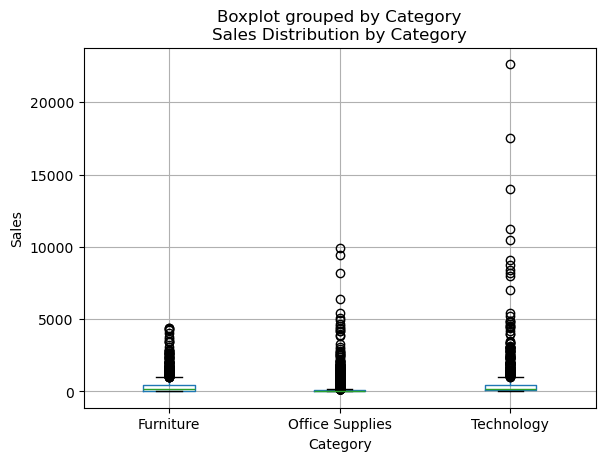

<Figure size 1100x1100 with 0 Axes>

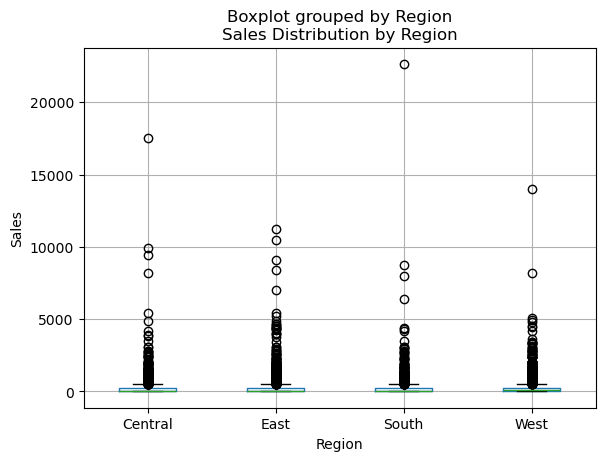

In [5]:
#Sales by category

plt.figure(figsize = (11,11))
cs.boxplot(column = 'Sales',by = "Category")
plt.title("Sales Distribution by Category")
plt.xlabel('Category')
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(11,11))
cs.boxplot(column = 'Sales',by = 'Region')
plt.title("Sales Distribution by Region")
plt.xlabel('Region')
plt.ylabel("Sales")
plt.show()

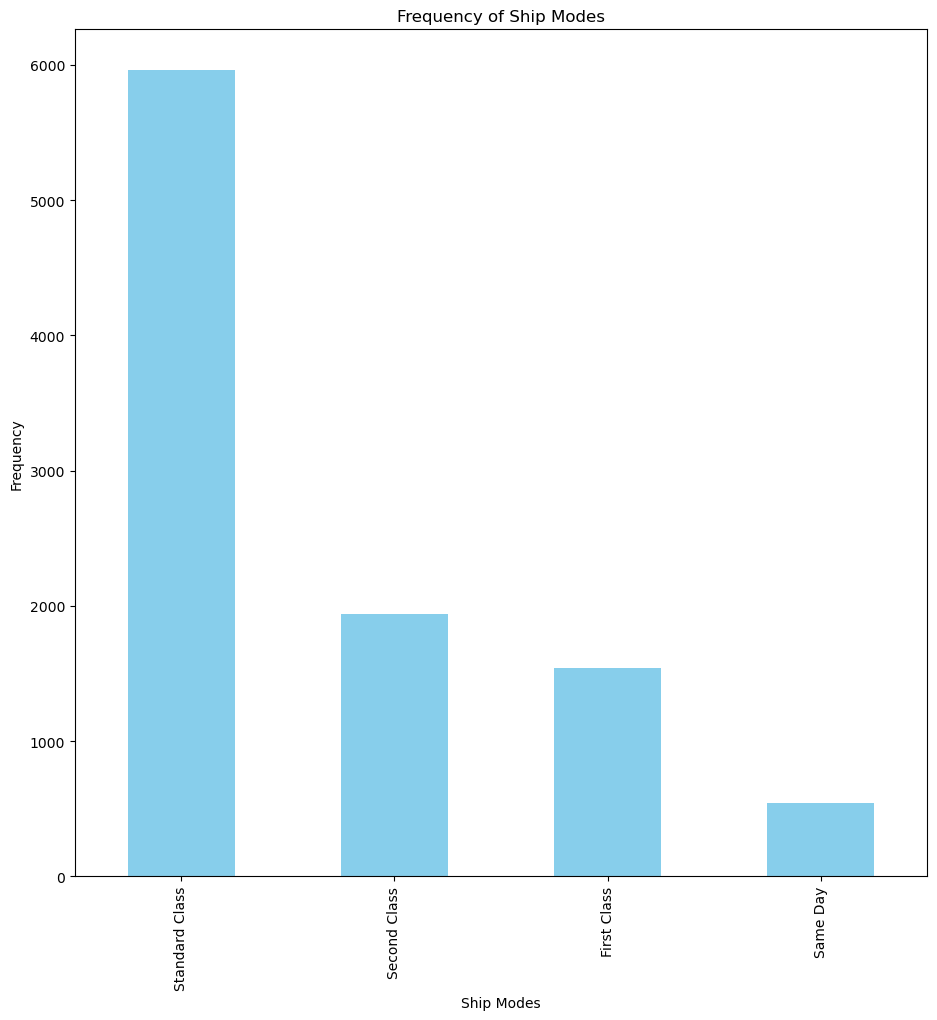

In [6]:
#Frequency of Ship Modes

cs['Delivery Time'] = (cs['Order Date'] - cs['Ship Date']).dt.days
smc = cs['Ship Mode'].value_counts()
plt.figure(figsize = (11,11))
smc.plot(kind = 'bar',color = 'skyblue')
plt.title('Frequency of Ship Modes')
plt.xlabel("Ship Modes")
plt.ylabel("Frequency")
plt.show()



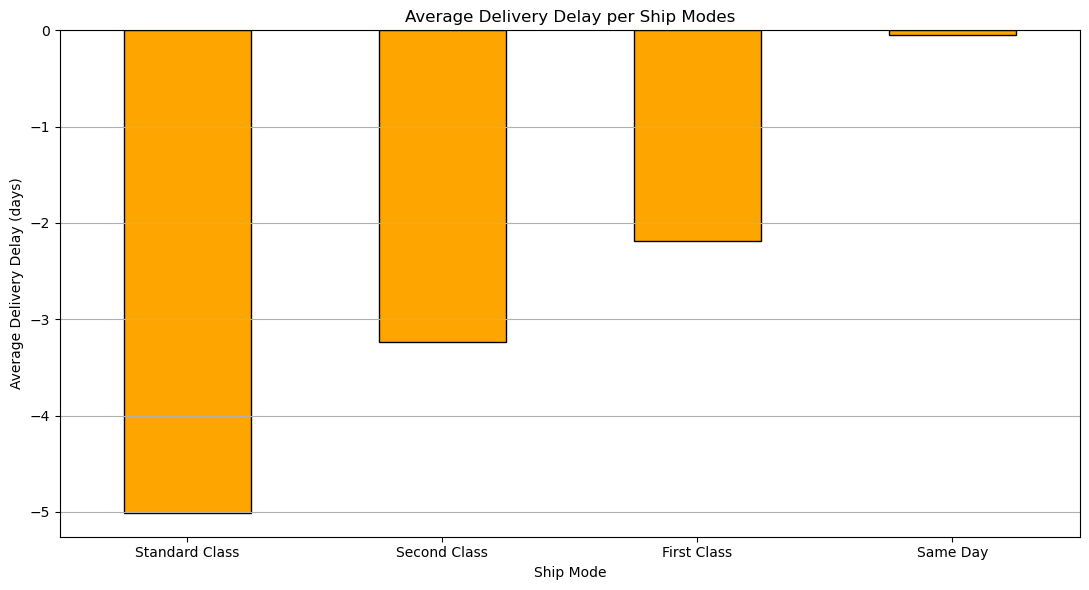

In [7]:
#Average Delivery Delay per Ship Modes RUNNNNN
avgdelay = cs.groupby('Ship Mode')['Delivery Time'].mean().sort_values()

# Plot the result
plt.figure(figsize=(11, 6))
avgdelay.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Delivery Delay per Ship Modes")
plt.xlabel("Ship Mode")
plt.ylabel("Average Delivery Delay (days)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
print("Hello world")

Hello world


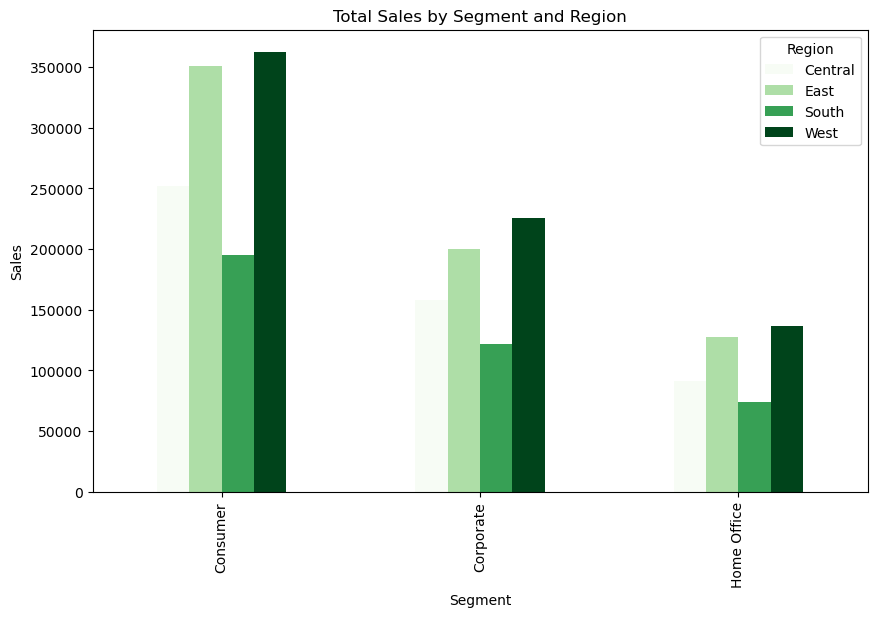

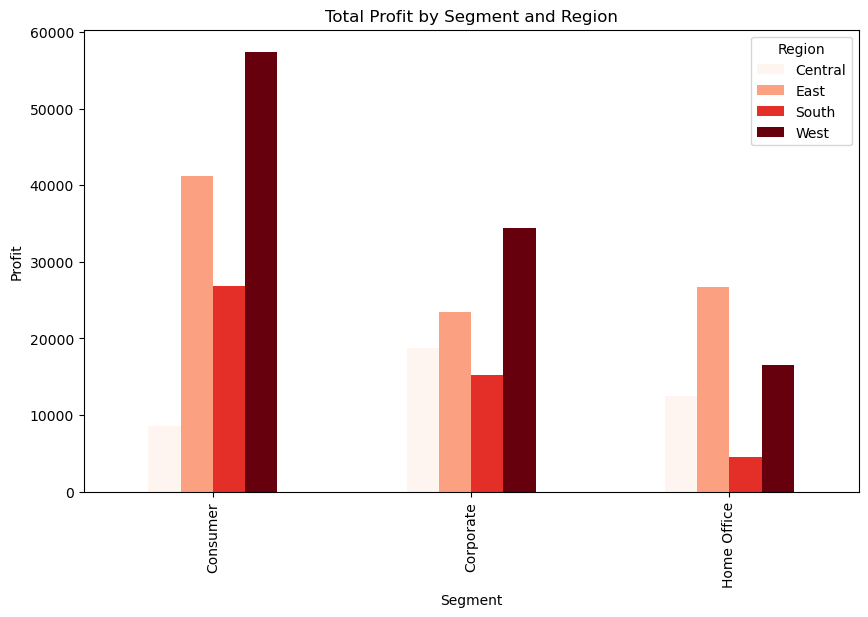

In [13]:
#Analyzing Profit and Sales by Segment and Region with bar plot

cs['Sales'] = pd.to_numeric(cs['Sales'],errors = 'coerce')
cs['Profit'] = pd.to_numeric(cs['Profit'],errors = 'coerce')

pivot = cs.pivot_table(values = ['Sales','Profit'],index = 'Segment',columns = 'Region',aggfunc = 'sum')

ps = pivot['Sales']
ps.plot(kind='bar', figsize=(10, 6), colormap='Blues')
plt.title('Total Sales by Segment and Region')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()


ps = pivot['Profit']
ps.plot(kind = 'bar',figsize = (10,6),colormap = 'Reds')
plt.title('Total Profit by Segment and Region')
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

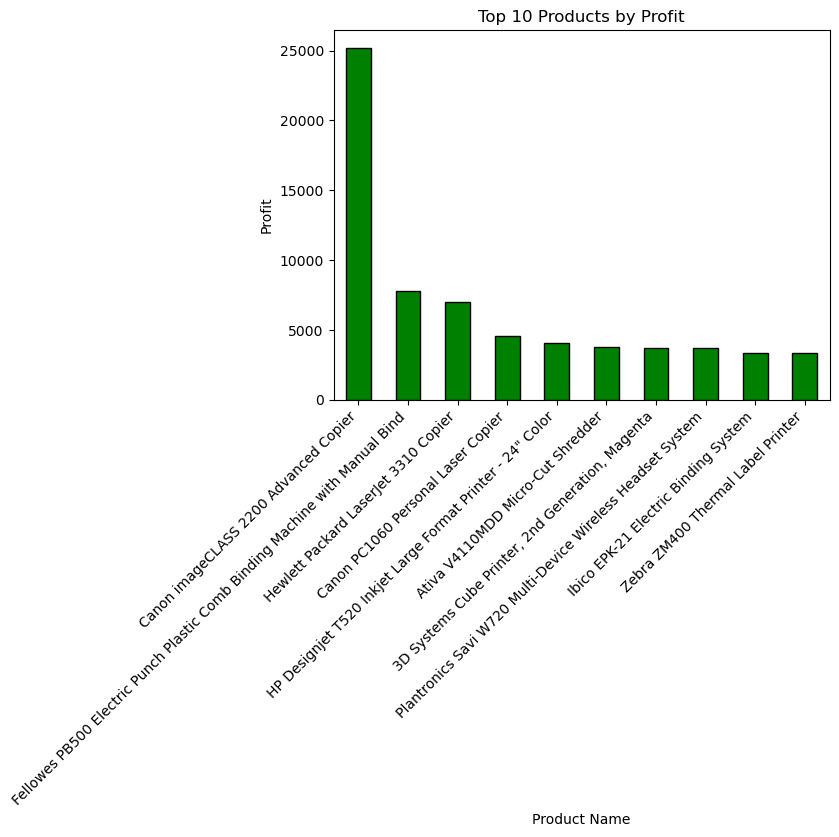

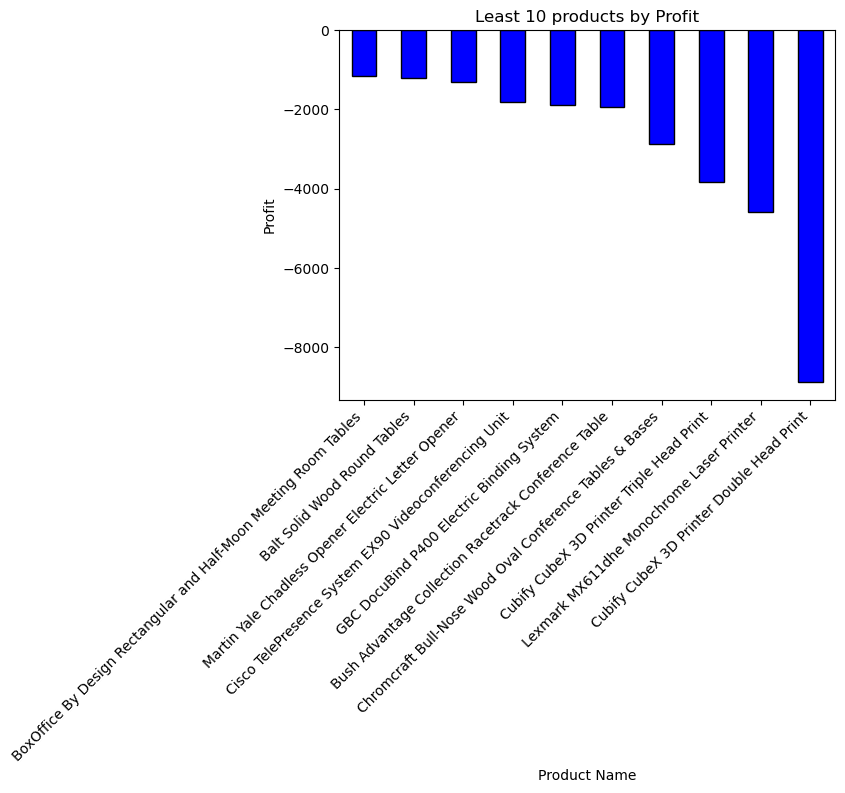

In [23]:
#Top & Bottom 10 products by profit

cs['Profit'] = pd.to_numeric(cs['Profit'],errors = 'coerce')
pp = cs.groupby('Product Name')['Profit'].sum().sort_values(ascending = False)
t10 = pp.head(10)
b10 = pp.tail(10)

t10.plot(kind = 'bar',color = 'green',edgecolor = 'black')
plt.title("Top 10 Products by Profit")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit')
plt.show()

b10.plot(kind = 'bar',color = 'blue',edgecolor = 'k')
plt.title('Least 10 products by Profit')
plt.xticks(rotation = 45,ha = 'right')
plt.ylabel("Profit")
plt.show()

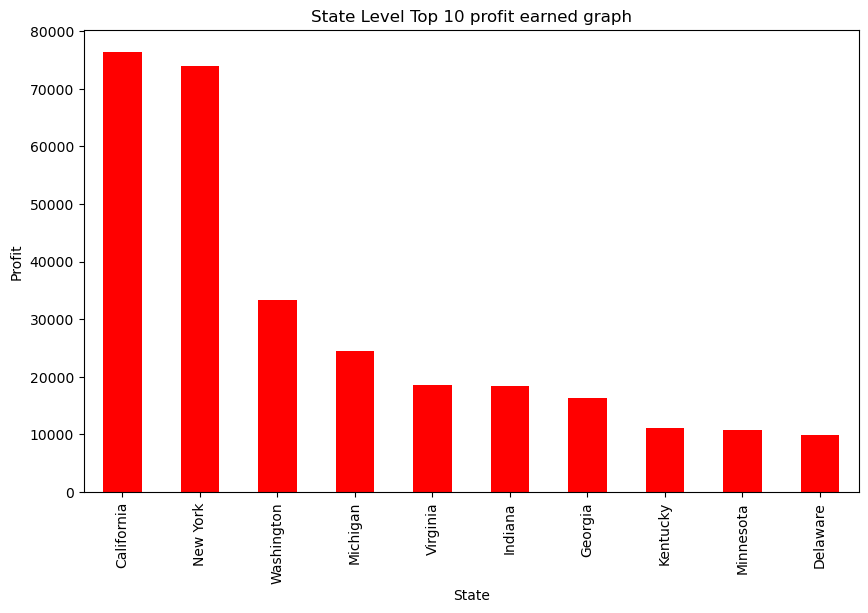

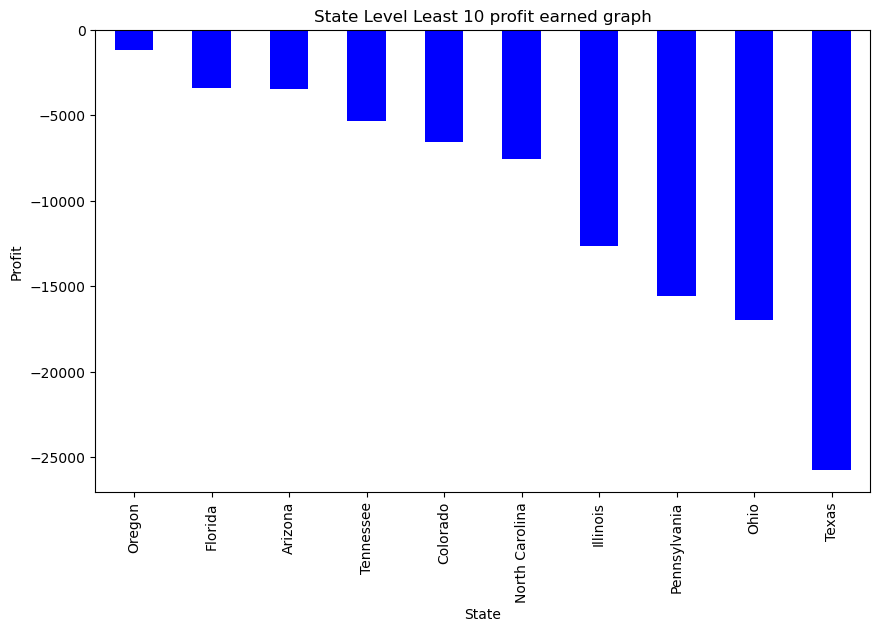

In [25]:
#State level profit analysis

sp = cs.groupby('State')['Profit'].sum().sort_values(ascending = False)

tss = sp.head(10)
bss = sp.tail(10)
plt.figure(figsize = (10,6))
tss.plot(kind = 'bar',color = 'r')
plt.xlabel("State")
plt.ylabel("Profit")
plt.title('State Level Top 10 profit earned graph')
plt.show()

plt.figure(figsize = (10,6))
bss.plot(kind = 'bar',color = 'b')
plt.xlabel("State")
plt.ylabel("Profit")
plt.title('State Level Least 10 profit earned graph')
plt.show()


C:\Users\mohit\AppData\Local\Temp\ipykernel_4584\3505260525.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_profit.index, y=city_profit.values, palette='YlGnBu')


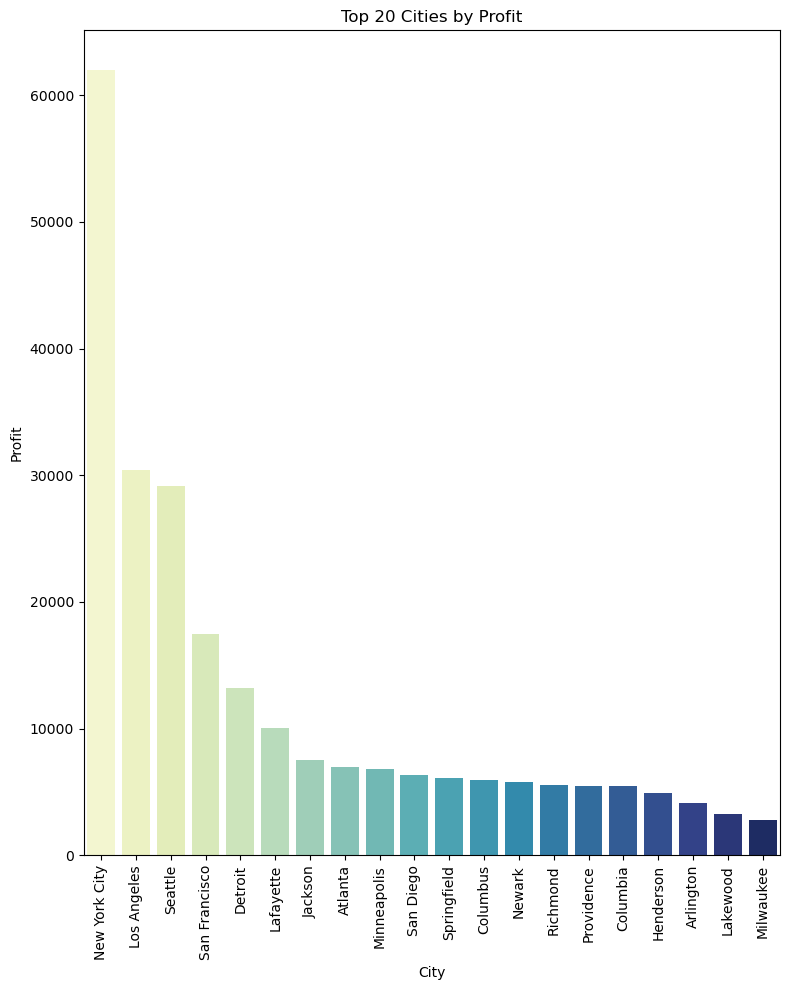

C:\Users\mohit\AppData\Local\Temp\ipykernel_4584\3505260525.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_profit.index, x=city_profit.values, palette='YlGnBu')


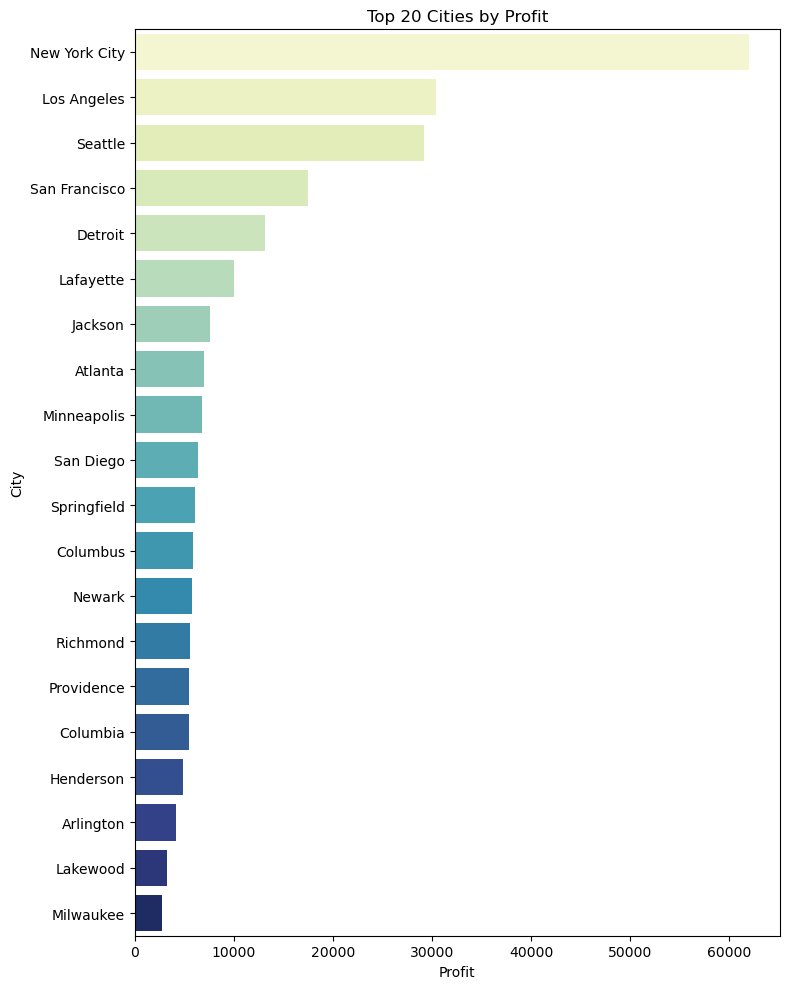

In [34]:
#Top 20 Cities by Profit

import seaborn as sns
city_profit = cs.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)

#x-axis oriented

plt.figure(figsize=(8, 10))
sns.barplot(x=city_profit.index, y=city_profit.values, palette='YlGnBu')
plt.title("Top 20 Cities by Profit")
plt.xlabel("City")
plt.ylabel("Profit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#y-axis oriented

plt.figure(figsize=(8, 10))
sns.barplot(y=city_profit.index, x=city_profit.values, palette='YlGnBu')
plt.title("Top 20 Cities by Profit")
plt.xlabel("Profit")
plt.ylabel("City")
plt.tight_layout()
plt.show()

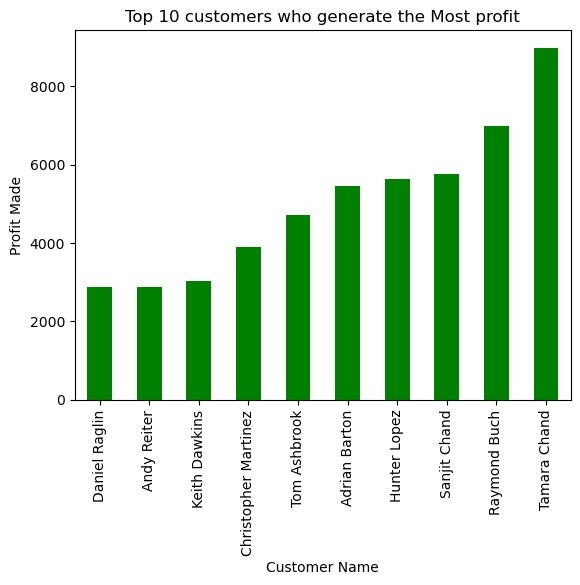

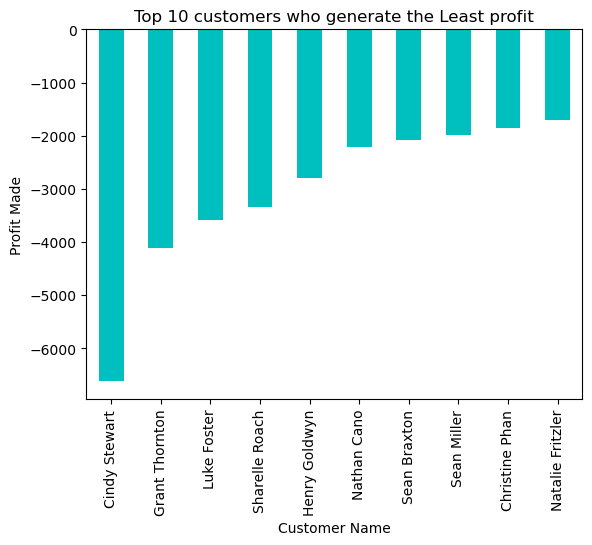

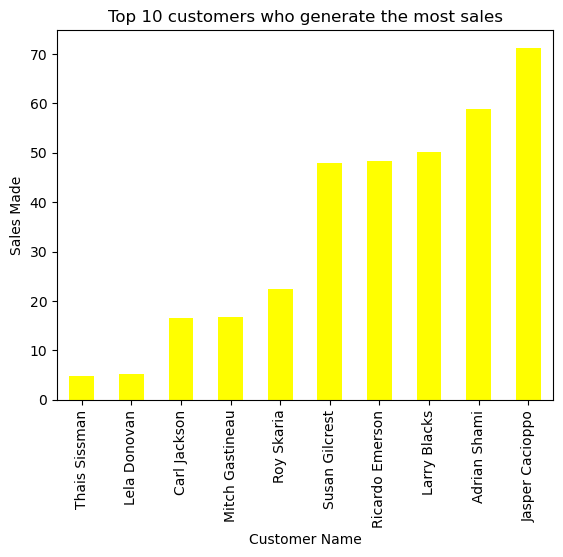

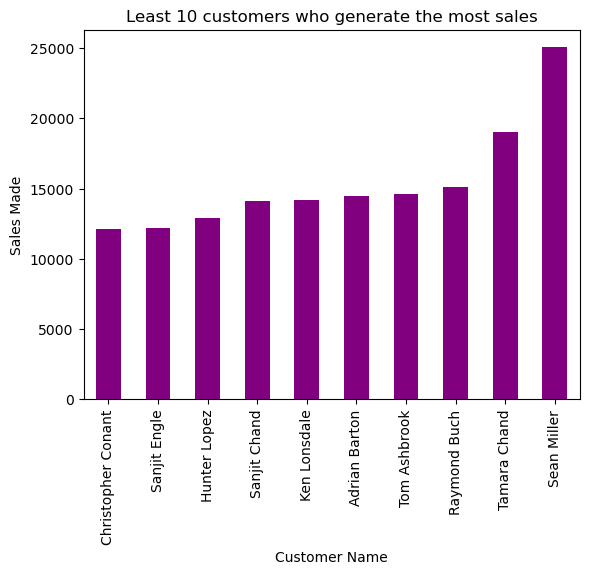

In [45]:
#top 10 and least 10 customers who generate the most profit

csm = cs.groupby('Customer Name')['Profit'].sum().sort_values()
csp = csm.tail(10)
csp.plot(kind = 'bar',color = 'g')
plt.xlabel('Customer Name')
plt.ylabel("Profit Made")
plt.title('Top 10 customers who generate the Most profit')
plt.show()

csl = csm.head(10)
csl.plot(kind = 'bar',color = 'c')
plt.xlabel("Customer Name")
plt.ylabel("Profit Made")
plt.title("Top 10 customers who generate the Least profit")
plt.show()

#top 10 and least 10 customers who generate the most sales

css = cs.groupby('Customer Name')['Sales'].sum().sort_values()
csh = css.head(10)
csd = css.tail(10)

csh.plot(kind = 'bar',color = 'yellow')
plt.title('Top 10 customers who generate the most sales')
plt.xlabel("Customer Name")
plt.ylabel('Sales Made')
plt.show()

csd.plot(kind = 'bar',color = 'purple')
plt.title('Least 10 customers who generate the most sales')
plt.xlabel("Customer Name")
plt.ylabel("Sales Made")
plt.show()